In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('./')

In [4]:
from src.visualization import plot_data

Dataset: [Graduate Admission 2 ](https://www.kaggle.com/mohansacharya/graduate-admissions/data#Admission_Predict_Ver1.1.csv)

In [5]:
!head -5 data/graduate-admission.csv

In [6]:
data = pd.read_csv('data/graduate-admission.csv', index_col='Serial No.')

# Data overview

Shape of the data:

In [7]:
data.shape

(500, 8)

Sample records:

In [8]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


Column names:

In [9]:
data.columns = [
    'GRE Score',
    'TOEFL Score',
    'University Rating',
    'SOP',
    'LOR',
    'CGPA',
    'Research',
    'Chance of Admit'
]

In [10]:
for column_name in ['University Rating', 'Research']:
        data[column_name] = data[column_name].astype('category')

Basic statistics:

In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
data.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.0,500.000000,500.00000,500.000000,500.0,500.00000
unique,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN
freq,NaN,NaN,162.0,NaN,NaN,NaN,280.0,NaN
mean,316.472000,107.192000,NaN,3.374000,3.48400,8.576440,NaN,0.72174
std,11.295148,6.081868,NaN,0.991004,0.92545,0.604813,NaN,0.14114
min,290.000000,92.000000,NaN,1.000000,1.00000,6.800000,NaN,0.34000
25%,308.000000,103.000000,NaN,2.500000,3.00000,8.127500,NaN,0.63000
50%,317.000000,107.000000,NaN,3.500000,3.50000,8.560000,NaN,0.72000
75%,325.000000,112.000000,NaN,4.000000,4.00000,9.040000,NaN,0.82000


Mind that `freq` is count in fact. At least for `pandas==0.25.3`.

Counts of non-NA entries:

In [13]:
data.count()

GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

Dependence on GRE Score:

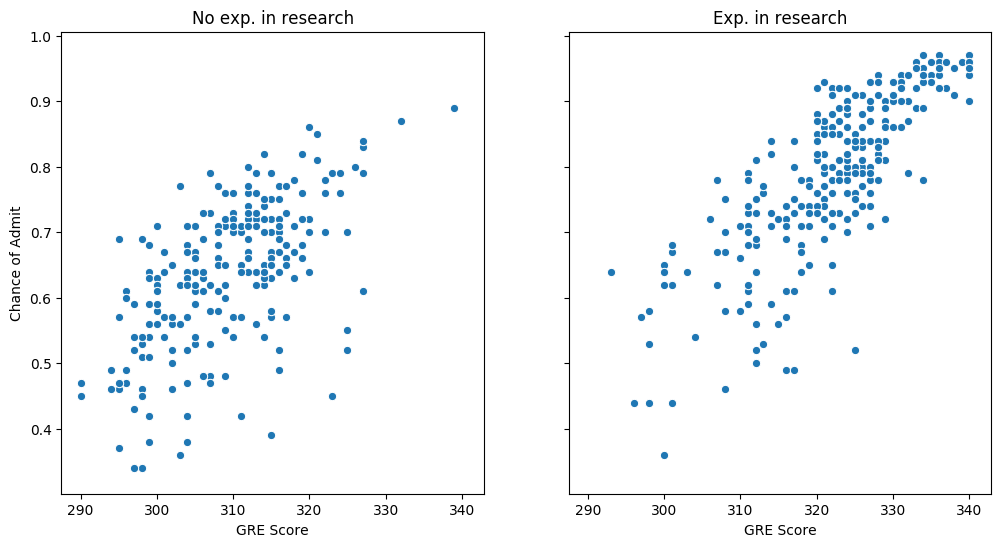

In [14]:
properties = {
    'x': "GRE Score",
    'y': "Chance of Admit",
    'x_label': "GRE Score",
    'y_label': "Chance of Admit",
    'category': "Research",
    'category_labels': {
        0: "No exp. in research",
        1: "Exp. in research",
    }
}

plot_data(data, properties)

Dependence on TEOFL Score:

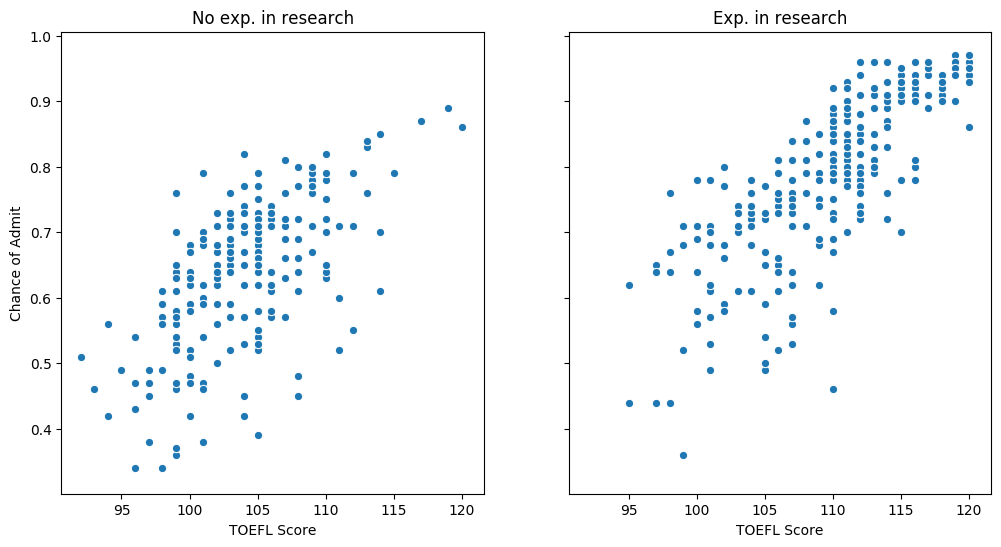

In [15]:
properties = {
    'x': "TOEFL Score",
    'y': "Chance of Admit",
    'x_label': "TOEFL Score",
    'y_label': "Chance of Admit",
    'category': "Research",
    'category_labels': {
        0: "No exp. in research",
        1: "Exp. in research",
    }
}

plot_data(data, properties)

In [18]:
for column_name in data.select_dtypes(include=['category']).columns:
    data[column_name] = data[column_name].astype('int')

In [ ]:
cols_to_normalize = [
    'GRE Score',
    'TOEFL Score',
    'SOP',
    'LOR',
    'CGPA',
    'Chance of Admit'
]
scaler = StandardScaler() # MinMaxScaler()
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

In [ ]:
df_train, df_test = train_test_split(
    data,
    test_size=0.2,
    stratify=data["Research"]
)

In [ ]:
df_train = torch.tensor(df_train.values, dtype=torch.float)
x_train, y_train = df_train[:, :-1], df_train[:, -1]

In [ ]:
df_test = torch.tensor(df_test.values, dtype=torch.float)
x_test, y_test = df_test[:, :-1], df_test[:, -1]

In [ ]:
os.makedirs('./data/', exist_ok=True)
with open('./data/linear-regression.pkl', 'wb') as f:
    pickle.dump({
        'x_train': x_train,
        'y_train': y_train,
        'x_test': x_test,
        'y_test': y_test
    }, f)